# HK Housing Analysis

## Introduction

Hong Kong is home to one of the most expensive housing markets in the world. 

## Data Sources
- [Hong Kong Monetary Authority (HKMA)](https://www.hkma.gov.hk/)
- [Ratings and Valuation Department (RVD)](https://www.rvd.gov.hk/)
- [Census and Statistics Department (Censtatd)](https://www.censtatd.gov.hk/home.html)

In [2]:
# Prerequisites
import pandas as panda
import pymysql
import matplotlib.pyplot as plot

# Create database connection
host = "localhost";
database = "hkhousinganalysis";
username = "root";
password = "";

connection = pymysql.connect(host=host, user=username, password=password, db=database)

cursor = connection.cursor()

## Consumer Price Index Performance

Below charts the CPI performance in Hong Kong.

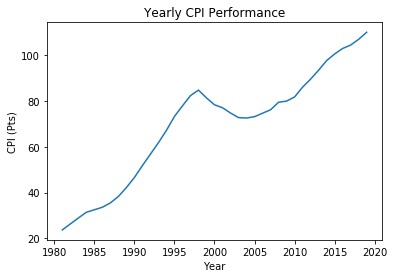

In [118]:
# CPI Data

cpiDataQuery = cursor.execute("SELECT `year`, `cpi` FROM `censtats_cpi_data`;")

cpiDataQuery = cursor.fetchall()

cpiDF = panda.DataFrame(cpiDataQuery)

yearToNum = []

cpiToNum = []

for row in cpiDF.iloc(0):
    if str(row[1]) != "":
        yearToNum.append(int(row[0]))
        cpiToNum.append(float(row[1]))
        
plot.plot(yearToNum, cpiToNum)
plot.title("Yearly CPI Performance")
plot.xlabel("Year")
plot.ylabel("CPI (Pts)")
plot.show()


## House Prices

Below charts the price averages per square foot for bought housing across Grades A to E housing properties on the market.

## Rent Prices

Below charts the price averages per square foot for rentals across Grades A to E housing properties on the market:

## Monthly Salaries

The monthly salaries below are in a table representing the monthly salaries for the past five years.

In [78]:
# Monthly Salaries Data

monthlySalariesDataQuery = cursor.execute("SELECT * FROM `censtats_monthlypay_amount_data`;")

monthlySalariesDataQuery = cursor.fetchall()

tableRetrieveColumnNames = []

for tableColumn in cursor.description:
    tableRetrieveColumnNames.append(tableColumn[0])

unemploymentDF = panda.DataFrame(monthlySalariesDataQuery, columns=tableRetrieveColumnNames)

tableColumns = unemploymentDF.columns

filteredTableColumns = [tableColumns[0]]
tableColumns = tableColumns[12:42]

for column in tableColumns:
    filteredTableColumns.append(column)

unemploymentDF[filteredTableColumns]

,year,occupational_group-elementary_occupations,occupational_group-service_and_sales_workers,occupational_group-craft_and_related_workers,occupational_group-clerical_support_workers,occupational_group-managers_and_administrato,industry_section-manufacturing,industry_section-electricity_and_gas_suppl,industry_section-construction,industry_section-import_and_export_trade,...,industry_section-administrative_and_suppor,industry_section-travel_agency_reservation,industry_section-education_and_public_admi,industry_section-human_health_activities_a,industry_section-miscellaneous_activities,industry_section-other_activities_not_clas,industry_section-restaurants,industry_section-accommodation_and_other_f,occupational_group-service_workers_and_shop_,occupational_group-clerks
0,2011,8400,None,13200,None,21300,12000,22000,15200,14500,...,12500,10800,22400,15000,8700,11700,9000,11800,9400,10700
1,2012,8600,None,14700,None,22300,12500,23000,16100,15000,...,12800,11400,23500,15500,9200,12500,9400,12500,10000,11000
2,2013,9400,10700,15500,11600,23300,13300,23500,17600,15500,...,14000,12000,24200,15800,9800,12700,10000,13000,None,None
3,2014,10000,11300,16500,12100,24100,14300,24500,18300,16000,...,14500,12600,24500,16400,10200,13600,10500,13600,None,None
4,2015,10600,12000,18100,13000,25300,14900,25000,20000,16500,...,15100,13100,25400,16700,11000,14000,11100,13800,None,None
5,2016,11100,12400,19000,13500,26000,15600,25800,21200,17100,...,15800,13800,26800,17600,11500,14500,11800,14400,None,None
6,2017,11700,12900,20000,14000,26800,16100,26500,22100,17500,...,16200,14100,27500,18200,12000,15000,12400,14900,None,None
7,2018,12300,13500,21000,14400,27500,16900,27800,22800,18300,...,16500,14800,28400,18800,12400,15600,13100,15500,None,None
8,2019,12900,14100,21900,15000,28100,17800,28200,23500,18800,...,17000,15300,29200,19500,13100,16300,None,None,None,None


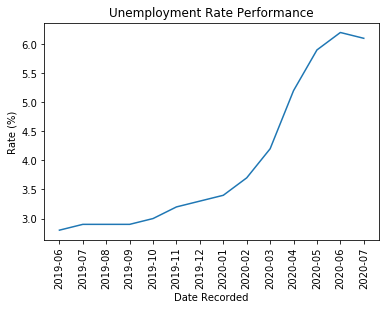

In [82]:
# Unemployment Rate Data

unemploymentDataQuery = cursor.execute("SELECT `end_of_month`, `unemploy_rate` FROM `hkma_econ_data`;")

unemploymentDataQuery = cursor.fetchall()

unemploymentDF = panda.DataFrame(unemploymentDataQuery)


endOfMonthToNum = []

unemploymentRateToNum = []

for row in unemploymentDF.iloc(0):
    if str(row[0])[5:7] != "00":
        endOfMonthToNum.append(str(row[0]))
        unemploymentRateToNum.append(panda.to_numeric(row[1]))
        
try:
    plot.plot(endOfMonthToNum, unemploymentRateToNum)
    plot.title("Unemployment Rate Performance")
    plot.xlabel("Date Recorded")
    plot.xticks(rotation=90)
    plot.ylabel("Rate (%)")
    
    plot.show()
except TypeError:
    pass




## Hang Seng Index vs Price Index vs Rent Index

The Hang Seng Index 

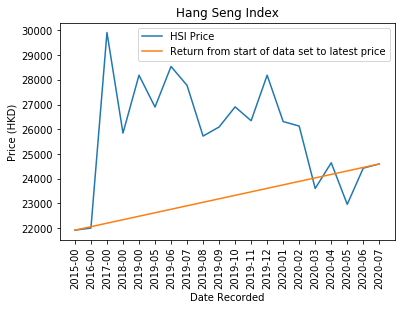

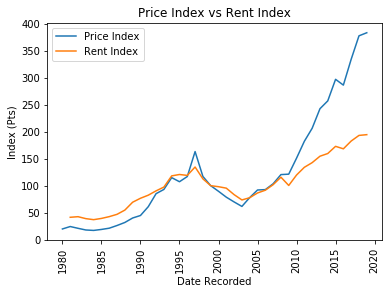

In [119]:
# HSI Data
hsiDataQuery = cursor.execute("SELECT `end_of_month`, `eq_mkt_hs_index` FROM `hkma_capitalmarkets_data`;")

hsiDataQuery = cursor.fetchall()

hsiDataDF = panda.DataFrame(hsiDataQuery)

endOfMonthToNum = []

hsiPriceToNum = []

for row in hsiDataDF.iloc(0):
    endOfMonthToNum.append(str(row[0]))
    hsiPriceToNum.append(panda.to_numeric(row[1]))
        
try:
    plot.plot(endOfMonthToNum, hsiPriceToNum, label="HSI Price")
    plot.plot([endOfMonthToNum[0], endOfMonthToNum[len(endOfMonthToNum)-1]], [hsiPriceToNum[0], hsiPriceToNum[len(hsiPriceToNum)-1]], label="Return from start of data set to latest price")
    plot.title("Hang Seng Index")
    plot.xlabel("Date Recorded")
    plot.xticks(rotation=90)
    plot.ylabel("Price (HKD)")
    plot.legend()
    plot.show()
except TypeError:
    pass
    
# Housing Price Index Data
housingPriceIndexDataQuery = cursor.execute("SELECT `year`, `All_Classes` FROM `rv_price_index_by_class_data`;")

housingPriceIndexDataQuery = cursor.fetchall()

housingPriceIndexDF = panda.DataFrame(housingPriceIndexDataQuery)

yearToNum = []

housingPriceToNum = []
for row in housingPriceIndexDF.iloc(0):
    if str(row[1]) != "":
        yearToNum.append(int(row[0]))
        housingPriceToNum.append(float(row[1]))
        
try:
    plot.plot(yearToNum, housingPriceToNum, label="Price Index")
    plot.title("Price Index vs Rent Index")
    plot.xlabel("Date Recorded")
    plot.xticks(rotation=90)
    plot.ylabel("Index (Pts)")

except TypeError:
    pass

# Housing Rent Index Data
housingRentIndexDataQuery = cursor.execute("SELECT `year`, `All_Classes` FROM `rv_rent_index_by_class_data`;")

housingRentIndexDataQuery = cursor.fetchall()

housingRentIndexDF = panda.DataFrame(housingRentIndexDataQuery)

yearToNum = []

housingRentToNum = []

for row in housingRentIndexDF.iloc(0):
    if str(row[1]) != "":
        yearToNum.append(int(row[0]))
        housingRentToNum.append(float(row[1]))

try:
    plot.plot(yearToNum, housingRentToNum, label="Rent Index")
    plot.legend()
    plot.show()
except TypeError:
    pass


## Conclusion